In [1]:
import matplotlib.pyplot as plt
import numpy as np
from wavebench import wavebench_figure_path
from wavebench.plot_utils import remove_ticks, plot_images
from wavebench.dataloaders.helmholtz_loader import get_dataloaders_helmholtz

## Helmholtz dataset

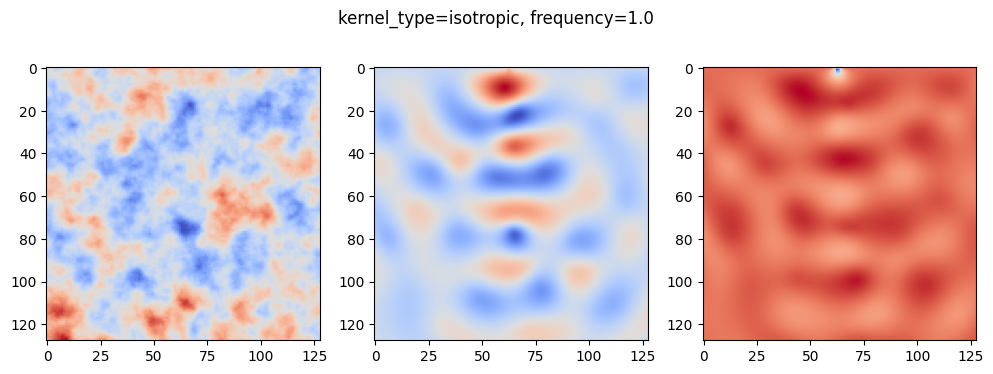

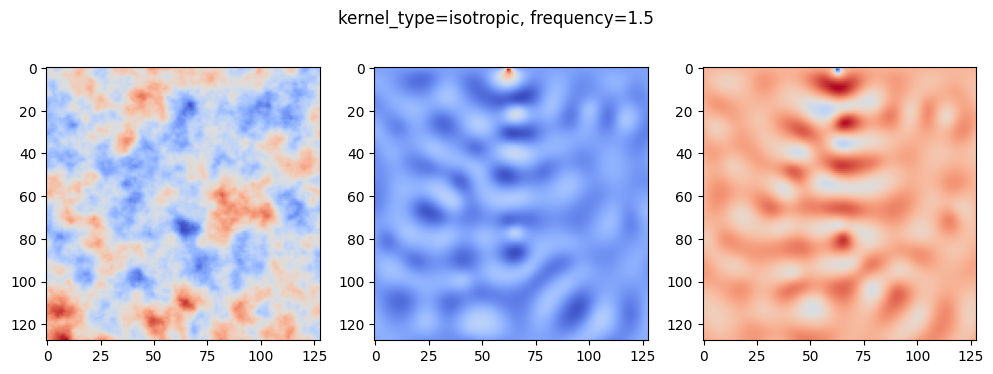

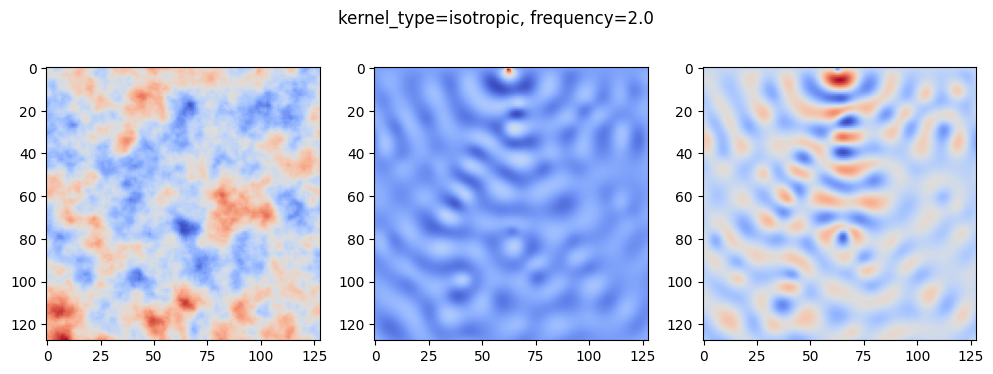

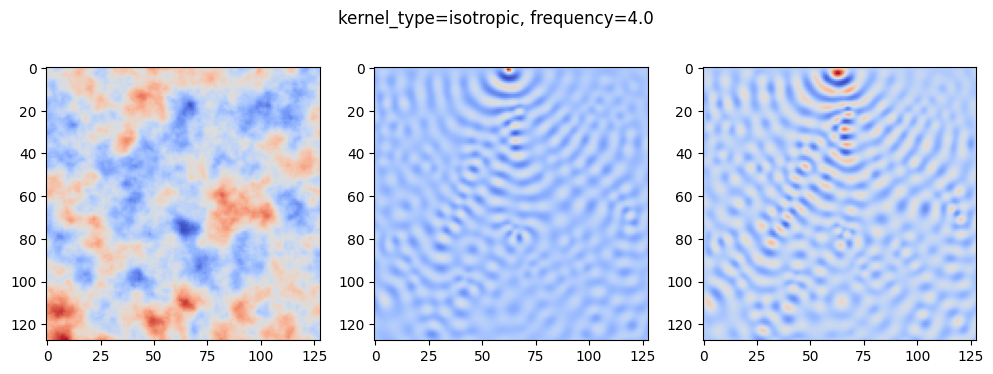

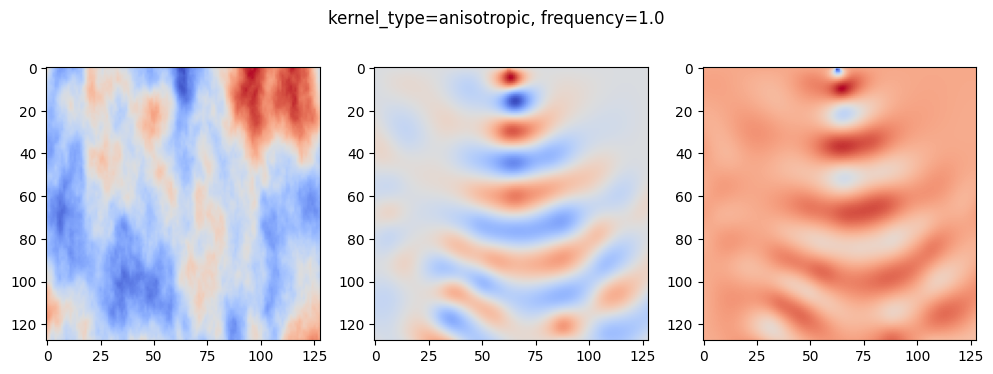

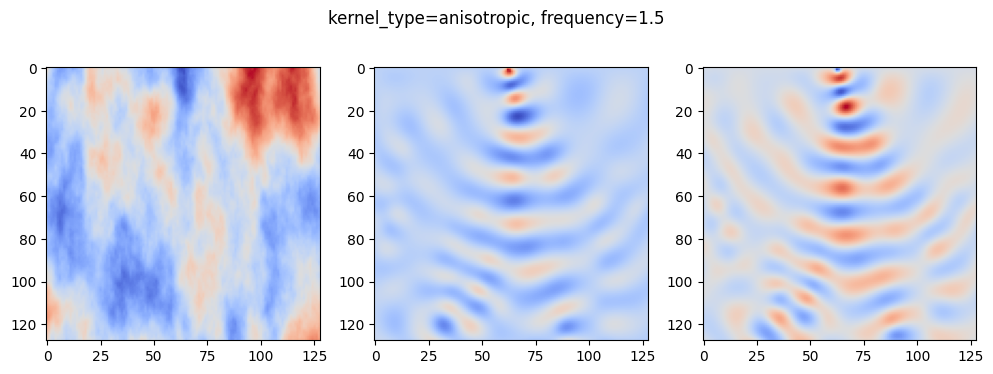

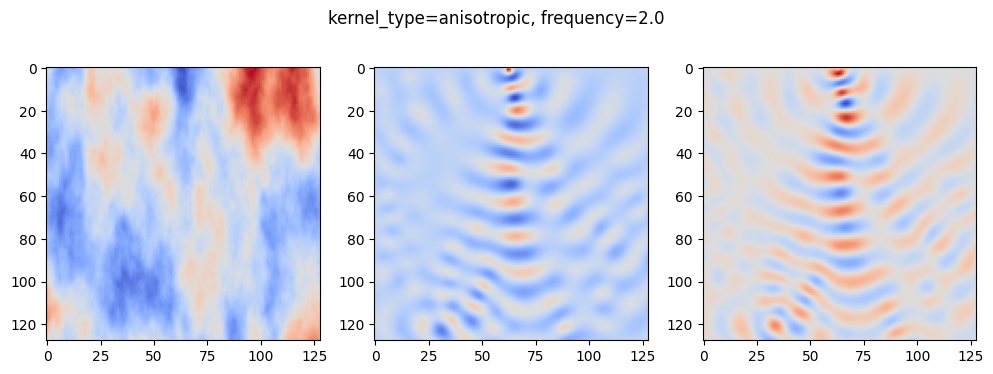

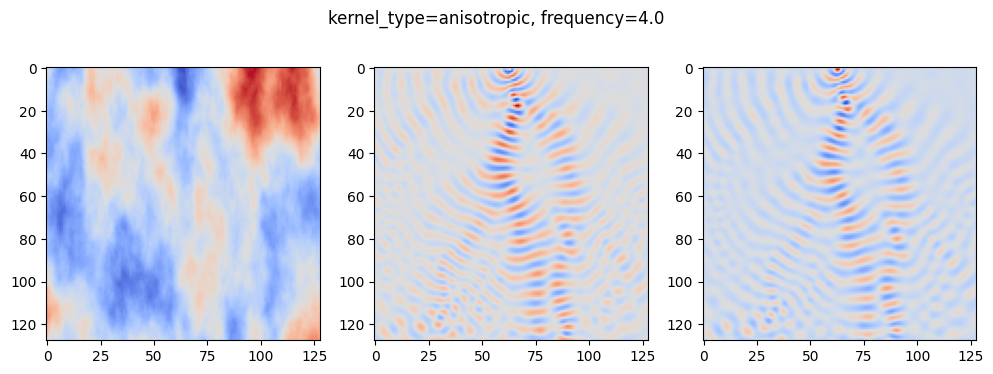

In [2]:
isotropic_dict = {}
anisotropic_dict = {}


for kernel_type in ['isotropic', 'anisotropic']:
  for frequency in [1.0, 1.5, 2.0, 4.0]:

    loaders = get_dataloaders_helmholtz(kernel_type, frequency, use_ffcv=True)
    a, b = next(iter(loaders['val']))

    if kernel_type == 'isotropic':
      isotropic_dict[frequency] = (a.squeeze(), b.squeeze())
    else:
      anisotropic_dict[frequency] = (a.squeeze(), b.squeeze())

    # print(a.mean(), a.std())
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(a.squeeze().numpy(), cmap='coolwarm')
    axes[1].imshow(b.squeeze()[0].numpy(), cmap='coolwarm')
    axes[2].imshow(b.squeeze()[1].numpy(), cmap='coolwarm')

    plt.suptitle(f'kernel_type={kernel_type}, frequency={frequency}')


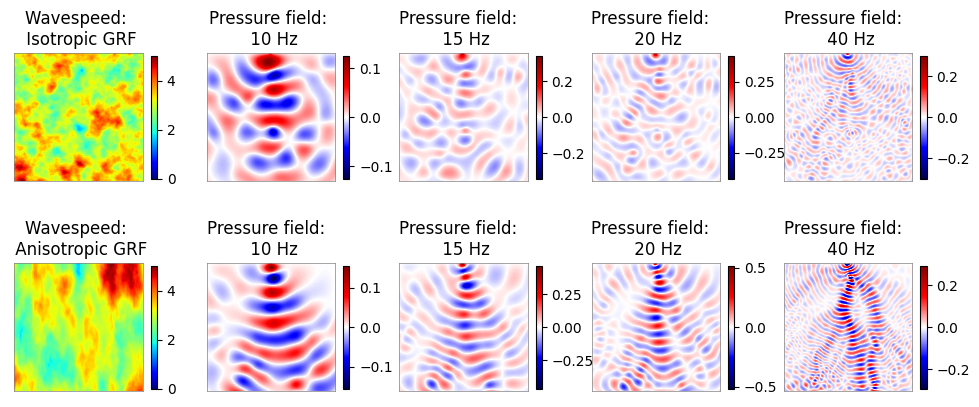

In [3]:
# a, b = isotropic_dict[1.0]

isotropic_pannels = [
  isotropic_dict[1.0][0],
  isotropic_dict[1.0][1][0],
  isotropic_dict[1.5][1][0],
  isotropic_dict[2.0][1][0],
  isotropic_dict[4.0][1][0] ]

anisotropic_pannels = [
  anisotropic_dict[1.0][0],
  anisotropic_dict[1.0][1][0],
  anisotropic_dict[1.5][1][0],
  anisotropic_dict[2.0][1][0],
  anisotropic_dict[4.0][1][0]]


nrows = 2
ncols = 5
fig_size = (12, 5)
cbar_shrink = 0.7
x_list = isotropic_pannels + anisotropic_pannels
for i in range(len(x_list)):
    x_list[i] = np.asarray(x_list[i])


import numpy as np
from wavebench.plot_utils import plot_image

fig = plt.figure()
fig.set_size_inches(fig_size)
axes = fig.subplots(nrows, ncols)
im = np.empty(axes.shape, dtype=object)


vrange_ = [(-np.max(np.abs(x)), np.max(np.abs(x)) ) for x in x_list]


for i, (x, ax_, v) in enumerate(zip(x_list, axes.flat, vrange_)):
    if i ==0 or i == 5:
        im_, _ = plot_image(x, ax=ax_, vmin=0, vmax=v[1], cmap='jet')
    else:
        im_, _ = plot_image(x, ax=ax_, vmin=v[0], vmax=v[1], cmap='seismic')
    im.flat[i] = im_
    fig.colorbar(im_, ax=ax_, shrink=cbar_shrink)

axes[0,0].set_title('Wavespeed: \n Isotropic GRF')
axes[0,1].set_title('Pressure field: \n 10 Hz')
axes[0,2].set_title('Pressure field:  \n 15 Hz')
axes[0,3].set_title('Pressure field:  \n 20 Hz')
axes[0,4].set_title('Pressure field:  \n 40 Hz')

axes[1,0].set_title('Wavespeed: \n Anisotropic GRF')
axes[1,1].set_title('Pressure field:  \n 10 Hz')
axes[1,2].set_title('Pressure field:  \n 15 Hz')
axes[1,3].set_title('Pressure field:  \n 20 Hz')
axes[1,4].set_title('Pressure field:  \n 40 Hz')

[remove_ticks(ax) for ax in axes.flatten()]

plt.savefig(f"{wavebench_figure_path}/helmholtz_demo.pdf", format="pdf", bbox_inches="tight")
